In [1]:
import numpy as np
from scipy.stats import moyal
import matplotlib.pyplot as plt

def searchPk(x, np):
    tmp = 0
    pk = 0
    for i in x[:-1]:
        tmp = np[int(i)]
        if tmp > pk:
            pk = tmp
    return pk

def getArea(x, np):
    summ = 0
    for i in x[:-1]:
        summ += np[int(i)]
    return summ

def getPulses(y):
    tmppulses = []
    for np in range( int(y.size/4e2) ):
        tmp = []
        tmpcnt = np*400
        for t in range(400):
            tmp.append( y[t+tmpcnt] )
        tmppulses.append( tmp )
    return tmppulses    

In [2]:
x25 = np.linspace(25, 400, 400//25)
x833 = np.linspace(8.33, 400, int(400/8.33))
x1 = np.linspace(1, 400, 400)

In [4]:
basename = "rmdpulsesAmp"
fc = np.linspace(1.10, 1.45, 8)
pk25 = []
pk833 = []
ch25 = []
ch833 = []

factorCh25 = 25./50.
factorCh833 = 8.33/50.

for i in fc:
    opFile = np.loadtxt(basename+str(int(i*100)/100)+".dat")
    yampl = opFile.T[1]
    sglpulses = getPulses(yampl)
    
    tmppk25 = 0
    tmppk833 = 0
    tmpch25 = 0
    tmpch833 = 0
    for i in range(len(sglpulses)):
        tmppk25 += searchPk(x25, sglpulses[i])
        tmppk833 += searchPk(x833, sglpulses[i])
        
        tmpch25 += getArea(x25, sglpulses[i])
        tmpch833 += getArea(x833, sglpulses[i])
    
    pk25.append( tmppk25 )
    pk833.append( tmppk833 )

    ch25.append( factorCh25*tmpch25 )
    ch833.append( factorCh833*tmpch833 )

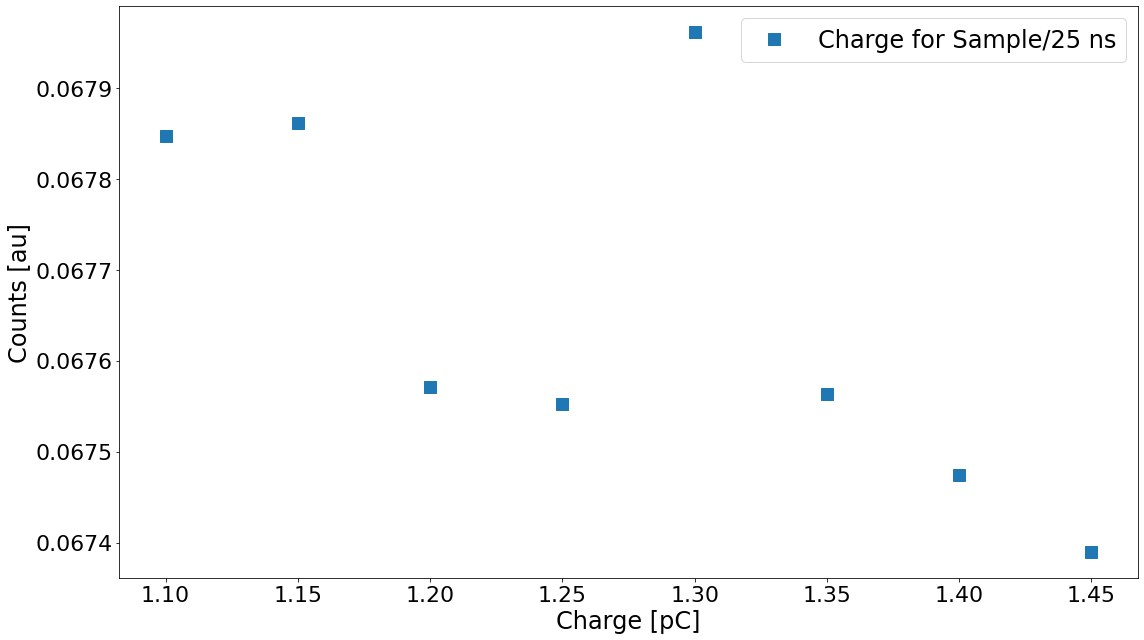

In [12]:
diffpk = []
diffch = []

for i in range(len(pk25)):
    diffpk.append(1-pk25[i]/pk833[i])
    diffch.append(1-ch25[i]/ch833[i])
    
plt.figure(figsize=(16,9))

plt.plot(fc, diffpk,'s', ms=12, label="Charge for Sample/25 ns")
#plt.plot(fc, diffch,'s', ms=12, label="Charge for Sample/25 ns")

#plt.plot(f, '^', ms=12, label="Charge for Sample/8.33 ns")

plt.legend(fontsize=24)
plt.ylabel("Counts [au]", fontsize=24)
plt.yticks(fontsize=22)
plt.xlabel("Charge [pC]", fontsize=24)
plt.xticks(fontsize=22)
#plt.xlim(100,215)

plt.tight_layout()
#plt.savefig("../plots/samplingChHistosAmp.png", dpi=100)
plt.show()

In [9]:
print("Averages for 25 ns:")

averagePk25 = 0
tmpcnt = 0
for pk in range(pkhist25.size):
    if pkhist25[pk] > 0:
        averagePk25 += pk*pkhist25[pk]
        tmpcnt += pkhist25[pk]
        
averagePk25 /= tmpcnt
print("Peak:", averagePk25, "[mV]")


averageCh25 = 0
tmpcnt = 0
for ch in range(chhist25.size):
    if chhist25[ch] > 0:
        averageCh25 += ch*chhist25[ch]
        tmpcnt += chhist25[ch]
        
averageCh25 /= tmpcnt
print("Charge", averageCh25,"[pC]")
print("AoP:",  averageCh25/averagePk25, "[nF]")


print("\n")
print("Averages for 8.33 ns:")

averagePk833 = 0
tmpcnt = 0
for pk in range(pkhist833.size):
    if pkhist833[pk] > 0:
        averagePk833 += pk*pkhist833[pk]
        tmpcnt += pkhist833[pk]

averagePk833 /= tmpcnt
print("Peak:", averagePk833,"[mV]")

averageCh833 = 0
tmpcnt = 0
for ch in range(chhist833.size):
    if chhist833[ch] > 0:
        averageCh833 += ch*chhist833[ch]
        tmpcnt += chhist833[ch]
        
averageCh833 /= tmpcnt
print("Charge:", averageCh833,"[pC]")
print("AoP:", averageCh833/averagePk833, "[nF]" )

print("\n")
print("AoP ratio for 25 ns and 8.33 ns:")
print( (averageCh25/averagePk25) / (averageCh833/averagePk833) )

print("\n")
print("1-Pk25/Pk833:")
print(1-averagePk25/averagePk833)

print("\n")
print("1-Ch25/Ch833:")
print(1-averageCh25/averageCh833)

Averages for 25 ns:
Peak: 63.5958 [mV]
Charge 122.3581 [pC]
AoP: 1.9239965532315026 [nF]


Averages for 8.33 ns:
Peak: 102.622 [mV]
Charge: 184.2321 [pC]
AoP: 1.795249556625285 [nF]


AoP ratio for 25 ns and 8.33 ns:
1.0717153757989148


1-Pk25/Pk833:
0.38029077585702875


1-Ch25/Ch833:
0.3358480959615616
